In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12})

import sys
sys.path.append("../../scripts")
import importlib

import model
importlib.reload(model)
from model import Model, model_from_file

import model_plot
importlib.reload(model_plot)
from model_plot import model_plot

import norms
importlib.reload(norms)
from norms import *

%matplotlib inline

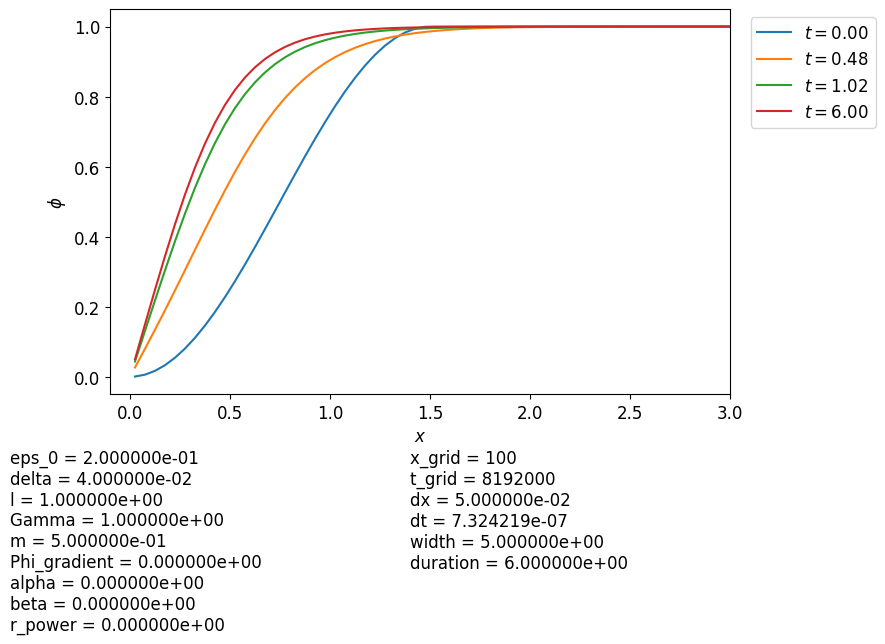

In [4]:
model_100 = model_from_file('data/model_100.csv')
model_plot(model_100, [0, 0.5, 1, 6], figsize=(8, 5), xlim=[-0.1, 3])

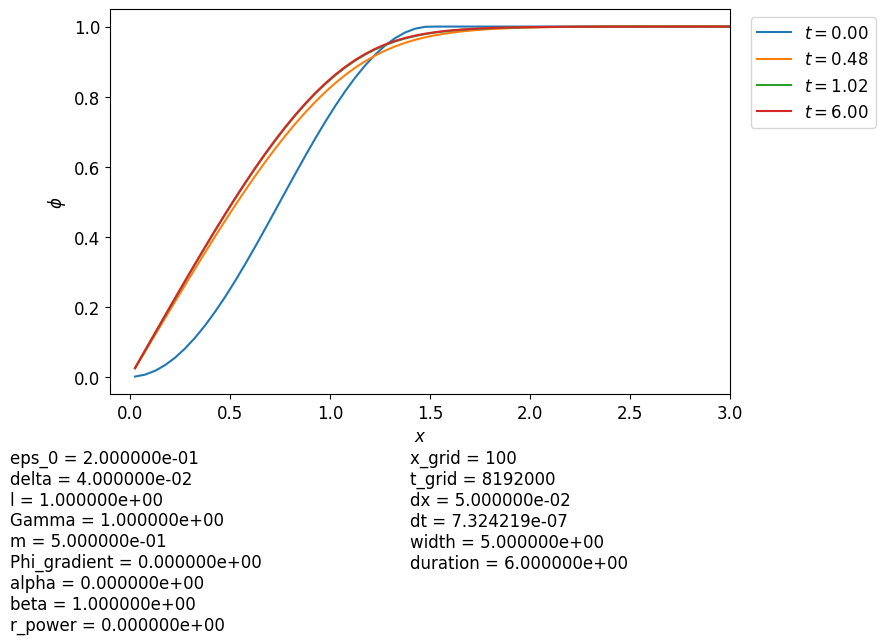

In [5]:
model_100_p = model_from_file('data/model_100_p.csv')
model_plot(model_100_p, [0, 0.5, 1, 6], figsize=(8, 5), xlim=[-0.1, 3])

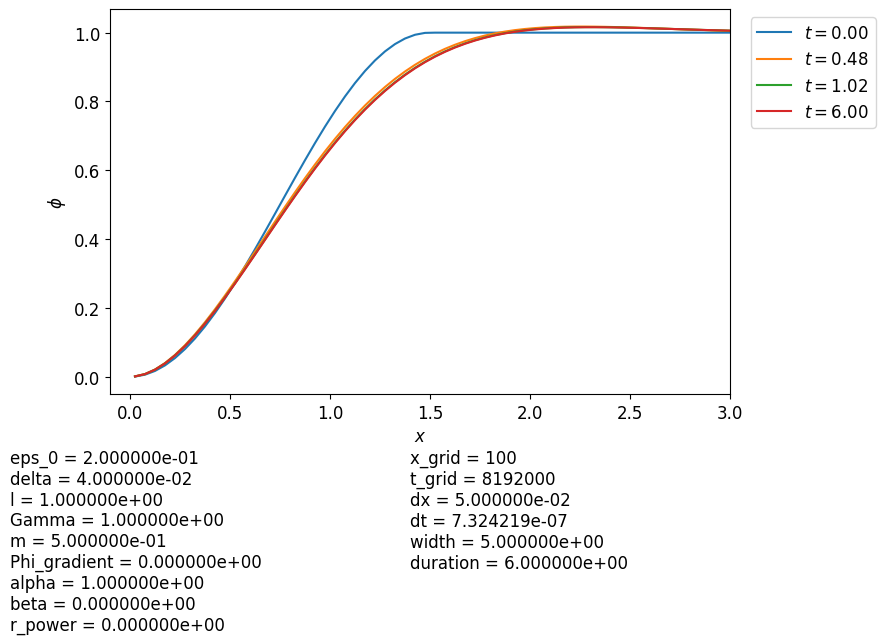

In [6]:
model_100_bi = model_from_file('data/model_100_bi.csv')
model_plot(model_100_bi, [0, 0.5, 1, 6], figsize=(8, 5), xlim=[-0.1, 3])

А можно использовать приближение параболой/кубической параболой только потока через левую границу:

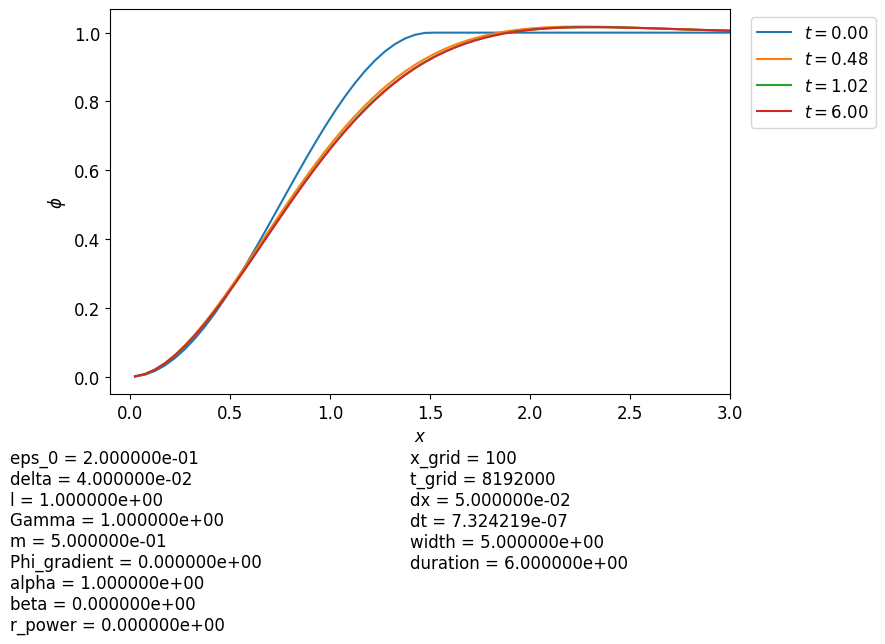

In [8]:
model_100_bi_simpler = model_from_file('data/model_100_bi_simpler.csv')
model_plot(model_100_bi_simpler, [0, 0.5, 1, 6], figsize=(8, 5), xlim=[-0.1, 3])

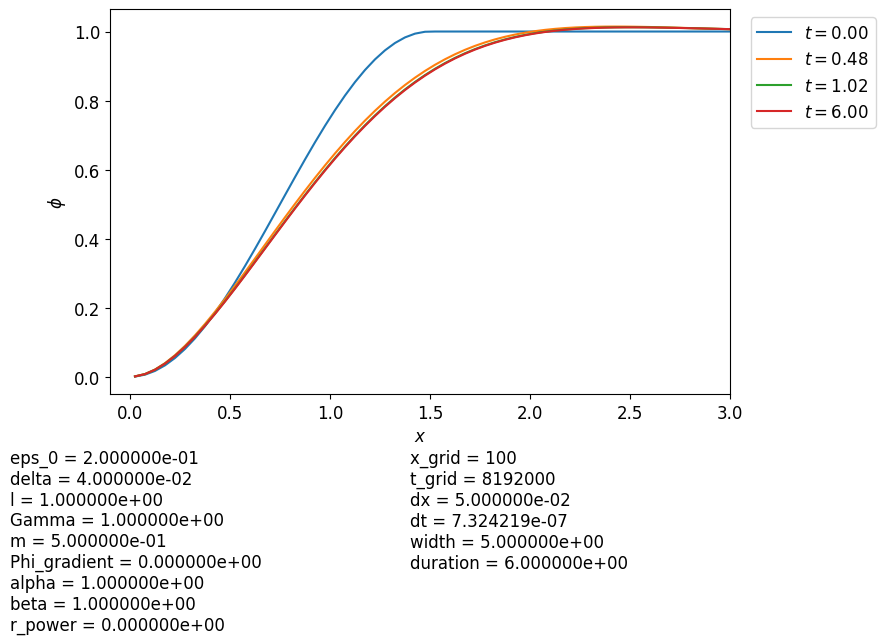

In [9]:
model_100_p_bi = model_from_file('data/model_100_p_bi.csv')
model_plot(model_100_p_bi, [0, 0.5, 1, 6], figsize=(8, 5), xlim=[-0.1, 3])

## Прямоугольные координаты

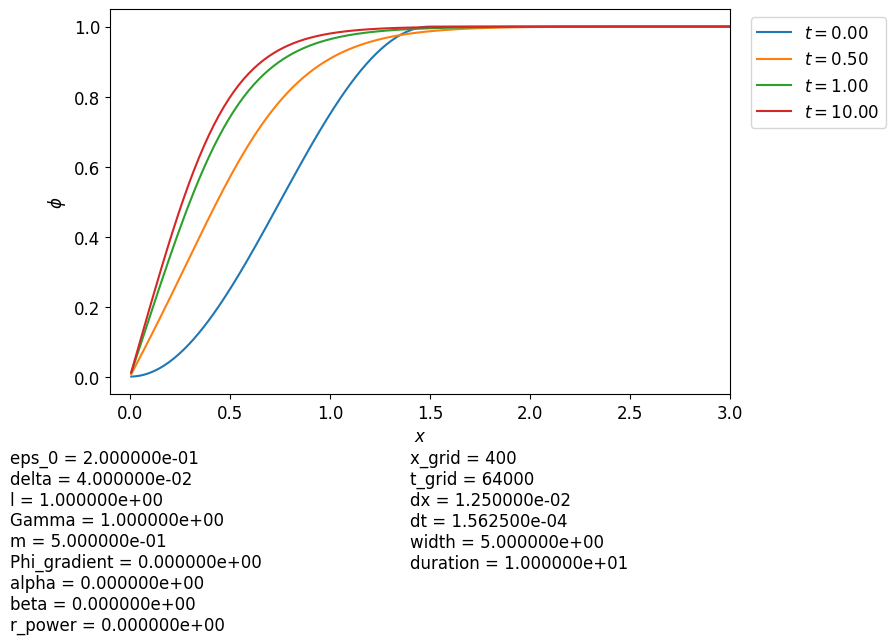

In [10]:
model_400 = model_from_file('data/model_400.csv')
model_plot(model_400, [0, 0.5, 1, 10], figsize=(8, 5), xlim=[-0.1, 3])

In [11]:
def norm_plot(model, grid):
    plt.figure(figsize=(10, 3))
    plt.title('Непрерывная норма градиента ({})'.format(grid))
    plt.xlabel('время')
    plt.yscale('log')
    plt.plot(model.ts, model.df_additional.iloc[:, -1])
    plt.show()

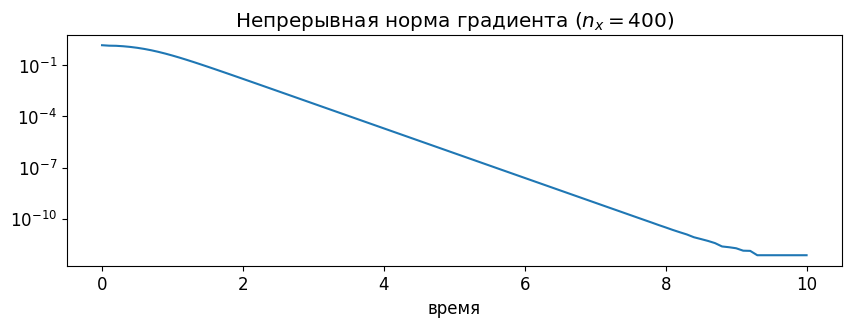

In [12]:
norm_plot(model_400, '$n_x = 400$')

In [13]:
model_400.df_additional.iloc[:, -1]

0      1.524261e+00
1      1.433727e+00
2      1.409721e+00
3      1.327350e+00
4      1.212095e+00
           ...     
96     7.105395e-13
97     7.105395e-13
98     7.105395e-13
99     7.105395e-13
100    7.105395e-13
Name: 2, Length: 101, dtype: float64

In [14]:
def plot_near_0(model, times, ylim):
    plt.figure(figsize=(8, 5))
    plt.title('Приближение средними по ячейкам вблизи 0')
    plt.xlabel('$x$')
    plt.ylabel('$\phi$')
    plt.xlim([-0.005, 0.105])
    plt.ylim(ylim)
    t_indices = [model.t_index(t) for t in times]
    for i in t_indices:
        plt.plot(model.xs, model.phi[i], '-o')
    plt.legend(['$t = {:.2f}$'.format(i * model.params['dt_data']) for i in t_indices],
               bbox_to_anchor=(1.02, 1), loc="upper left")
    for i in range(10):
        x = i * model.params['dx']
        plt.plot([x, x], [0, 1], '--', color='black')
    plt.show()
    a_higher = model.df_additional.iloc[-1, -3]
    b_higher = model.df_additional.iloc[-1, -2]
    print(a_higher, 'x^(a+1) +', b_higher, 'x^a')

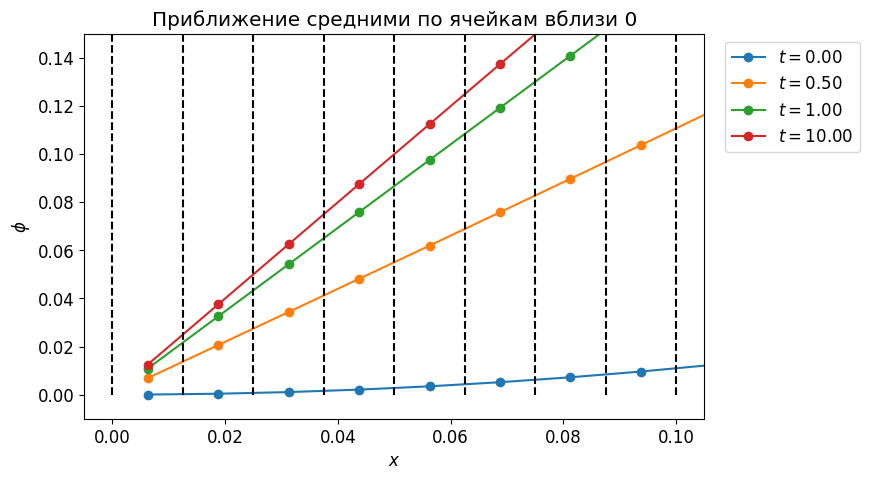

-0.00185153418 x^(a+1) + 2.00000003 x^a


In [15]:
plot_near_0(model_400, [0, 0.5, 1, 10], [-0.01, 0.15])

## Цилиндрические координаты

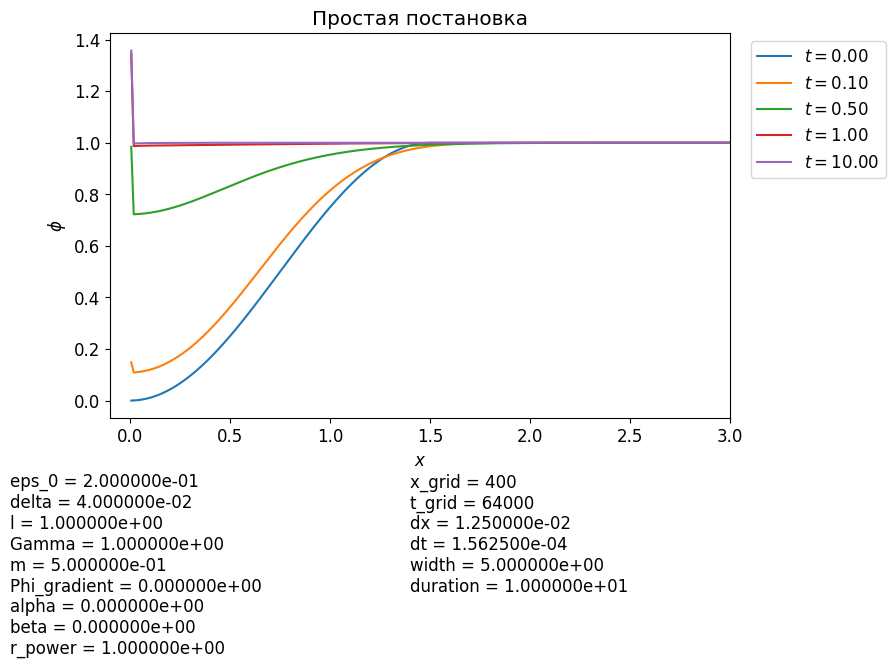

In [16]:
model_400_cyl_broken = model_from_file('data/model_400_cyl_broken.csv')
model_plot(model_400_cyl_broken, [0, 0.1, 0.5, 1, 10], figsize=(8, 5), xlim=[-0.1, 3],
           title='Простая постановка')

Сделаем `s_border[0] = s_border[1]`.

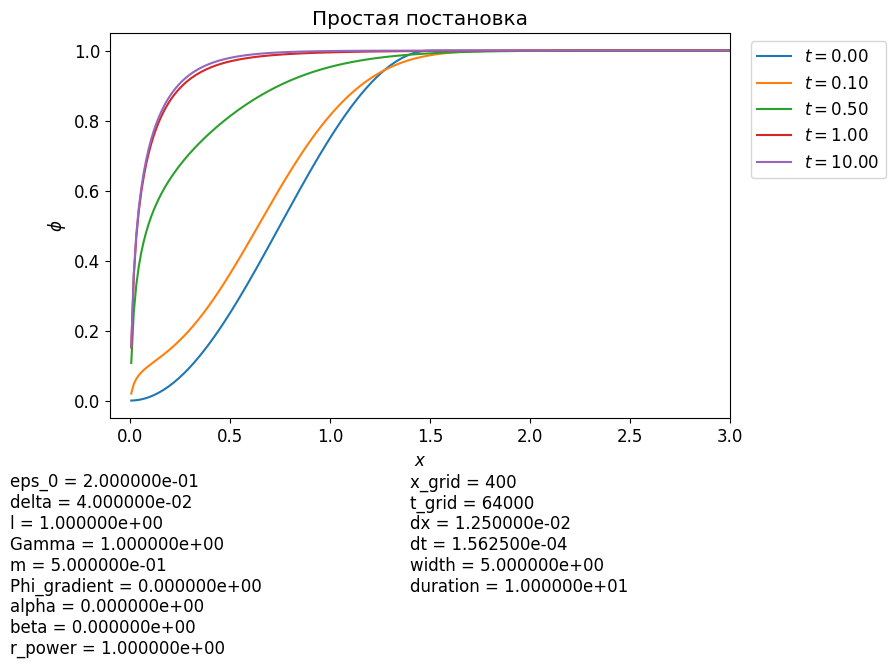

In [17]:
model_400_cyl = model_from_file('data/model_400_cyl.csv')
model_plot(model_400_cyl, [0, 0.1, 0.5, 1, 10], figsize=(8, 5), xlim=[-0.1, 3],
           title='Простая постановка')

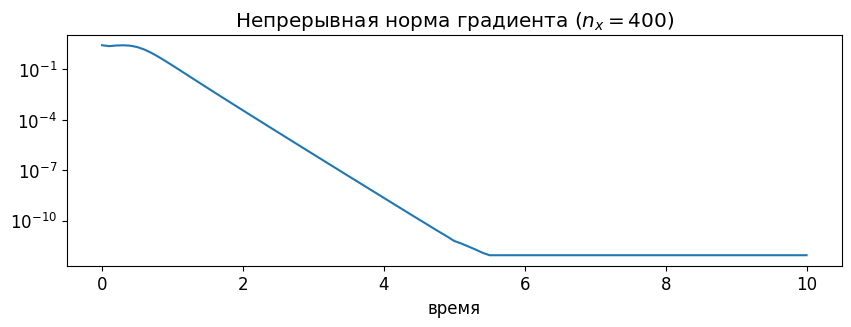

In [18]:
norm_plot(model_400_cyl, '$n_x = 400$')

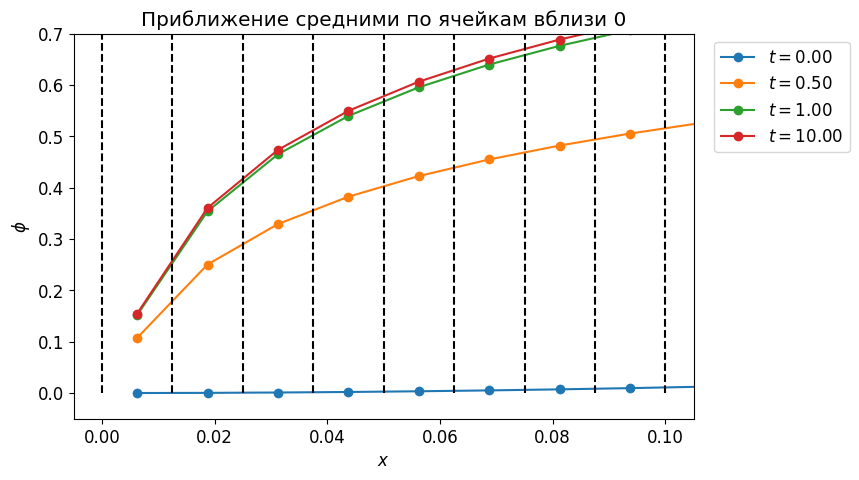

-0.121201601 x^(a+1) + 18.5502187 x^a


In [19]:
plot_near_0(model_400_cyl, [0, 0.5, 1, 10], [-0.05, 0.7])

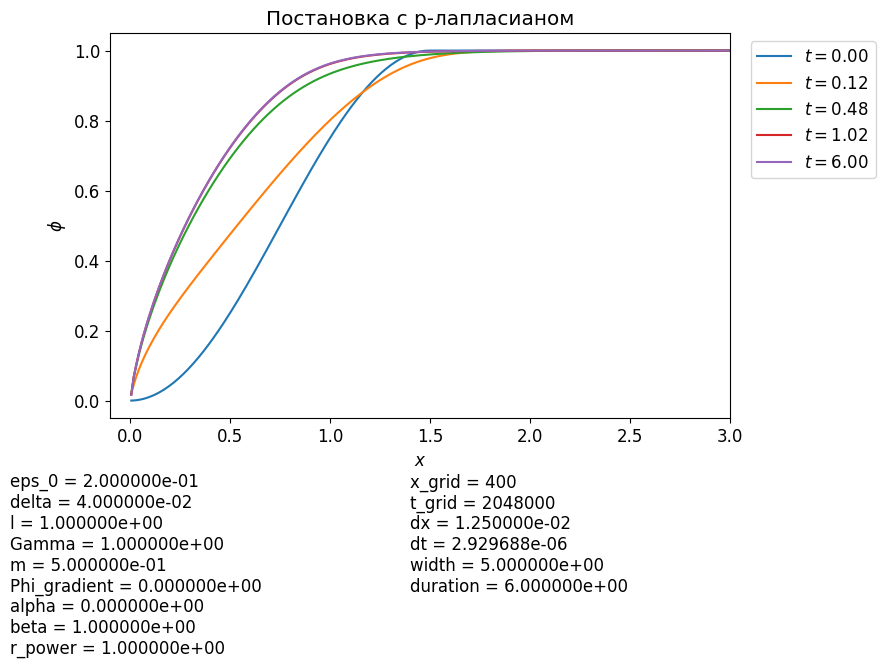

In [20]:
model_400_cyl_p = model_from_file('data/model_400_cyl_p.csv')
model_plot(model_400_cyl_p, [0, 0.1, 0.5, 1, 6], figsize=(8, 5), xlim=[-0.1, 3],
           title='Постановка с p-лапласианом')

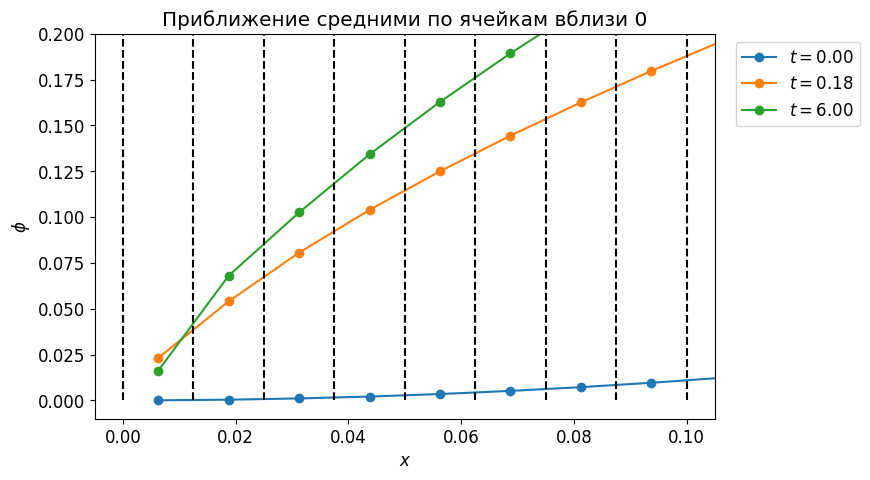

144.866406 x^(a+1) + 0.58636689 x^a


In [21]:
plot_near_0(model_400_cyl_p, [0, 0.2, 6], [-0.01, 0.2])

С `s_border[0] = 0` не работает даже с p-лапласианом.

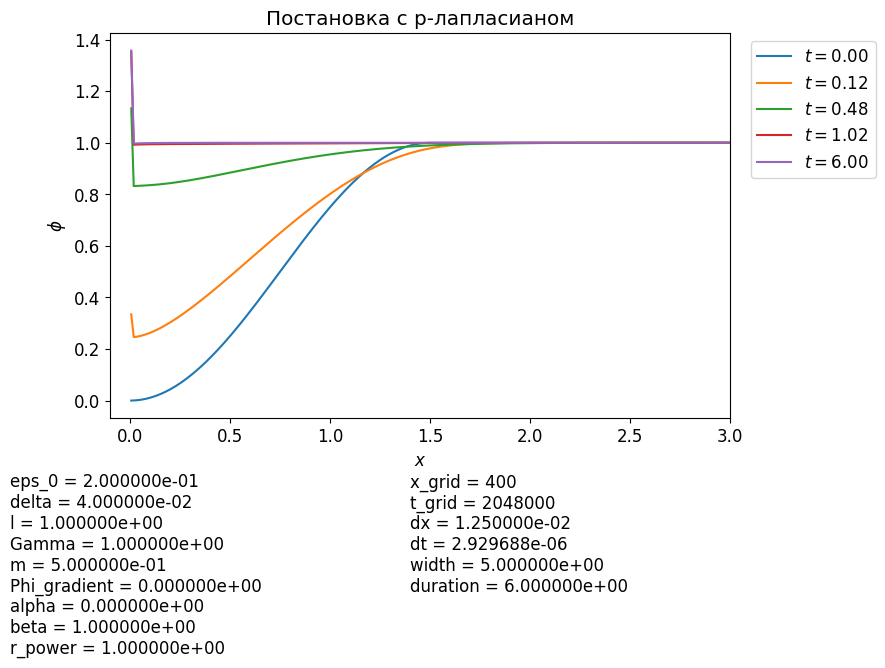

In [22]:
model_400_cyl_p_broken = model_from_file('data/model_400_cyl_p_broken.csv')
model_plot(model_400_cyl_p_broken, [0, 0.1, 0.5, 1, 6], figsize=(8, 5), xlim=[-0.1, 3],
           title='Постановка с p-лапласианом')

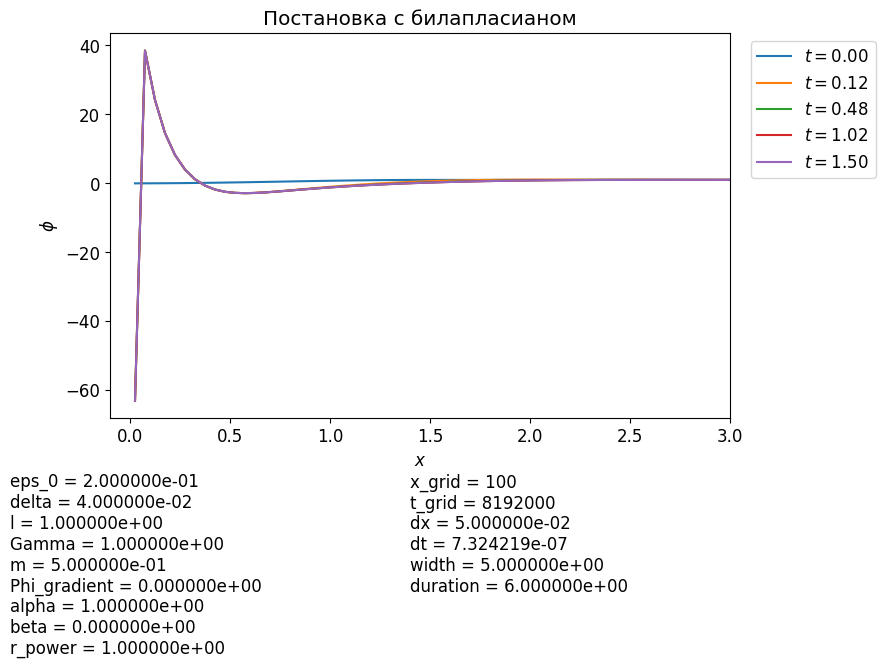

In [23]:
model_100_cyl_bi = model_from_file('data/model_100_cyl_bi.csv')
model_plot(model_100_cyl_bi, [0, 0.1, 0.5, 1, 1.5], figsize=(8, 5), xlim=[-0.1, 3],
           title='Постановка с билапласианом')